In [86]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')
import backtrader as bt
import datetime

# print(plt.style.available)

In [87]:
### Momentum
# if close[2] > close[1] -> buy. If the close[2] < close[1] -> sell
class Momentum(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close

    def next(self):

        if self.dataclose[-2] > self.dataclose[-1]:
            self.order = self.buy()
            print(f'Buy executed @ {self.dataclose[0]}')
        if self.dataclose[-2] < self.dataclose[-1]:
            self.order = self.sell()
            print(f'Sell executed @ {self.dataclose[0]}')
        else:
            self.order = self.close()
            print(f'Closing @ {self.dataclose[0]}')
           


In [88]:
cerebro = bt.Cerebro()
cerebro.addstrategy(Momentum)

0

In [89]:
import yfinance as yf
tsla = yf.download('TSLA')
tsla_bt = bt.feeds.PandasData(dataname=tsla)
cerebro.adddata(tsla_bt)

[*********************100%%**********************]  1 of 1 completed


In [90]:
cerebro.run()

Sell executed @ 1.5926669836044312
Buy executed @ 1.5886670351028442
Closing @ 1.5886670351028442
Buy executed @ 1.4639999866485596
Closing @ 1.4639999866485596
Buy executed @ 1.2799999713897705
Closing @ 1.2799999713897705
Buy executed @ 1.0740000009536743
Closing @ 1.0740000009536743
Buy executed @ 1.053333044052124
Closing @ 1.053333044052124
Buy executed @ 1.1640000343322754
Closing @ 1.1640000343322754
Sell executed @ 1.159999966621399
Buy executed @ 1.136667013168335
Closing @ 1.136667013168335
Buy executed @ 1.2093329429626465
Closing @ 1.2093329429626465
Sell executed @ 1.3226670026779175
Sell executed @ 1.3259999752044678
Sell executed @ 1.3760000467300415
Sell executed @ 1.4606670141220093
Sell executed @ 1.3533329963684082
Buy executed @ 1.3480000495910645
Closing @ 1.3480000495910645
Buy executed @ 1.399999976158142
Closing @ 1.399999976158142
Sell executed @ 1.4193329811096191
Sell executed @ 1.3966670036315918
Buy executed @ 1.3700000047683716
Closing @ 1.3700000047683716

<Axes: xlabel='timestamp'>

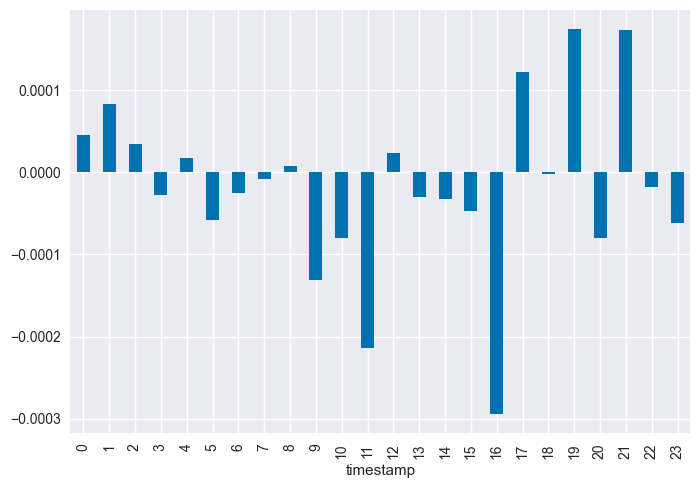

In [91]:
df = pd.read_csv('modified_data_eurusd_2020_jan.csv', parse_dates = True, index_col = 'timestamp')
df['return'] = np.log(df.close / df.close.shift(1))
df['return'].groupby(df.index.hour).mean().plot(kind='bar')

In [119]:
class HourlyBias(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close

    def next(self):
        if self.datas[0].datetime.datetime().hour == 13:
            self.ordder = self.sell()
            print(f'selling at{self.dataclose[0]}')
        if self.datas[0].datetime.datetime().hour == 17:    
            self.order = self.buy()
            print(f'buying at{self.dataclose[0]}')

    def plot(self, plotter=None, numfigs=1, iplot=True, **kwargs):        
        if 1:
            pass


In [120]:
data = bt.feeds.PandasData( dataname=df,open =0,
                            high = 1,
                            low = 2,
                            close = 3,
                            volume = 4,
                            openinterest = -1)

In [121]:
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(HourlyBias)

cerebro.run()

selling at1.11847
buying at1.12004
selling at1.11298
buying at1.11634
selling at1.12032
buying at1.11885
selling at1.11817
buying at1.11416
selling at1.11272
buying at1.11197
selling at1.11046
buying at1.11022
selling at1.10931
buying at1.11128
selling at1.11203
buying at1.11331
selling at1.11303
buying at1.1122
selling at1.11479
buying at1.11521
selling at1.11588
buying at1.11407
selling at1.11122
buying at1.10937
selling at1.10857
buying at1.10826
selling at1.11054
buying at1.10976
selling at1.10786
buying at1.10753
selling at1.10904
buying at1.10461
selling at1.10355
buying at1.10247
selling at1.10244
buying at1.10125
selling at1.10105
buying at1.1
selling at1.10014
buying at1.09989
selling at1.10228
buying at1.10354
selling at1.10371
buying at1.10805


In [122]:
# from backtrader_plotting import Bokeh
# from backtrader_plotting.schemes import Tradimo
# b = Bokeh(style='bar', plot_mode='single', scheme=Tradimo())
# cerebro.plot(b)  # This will display the bar-style chart

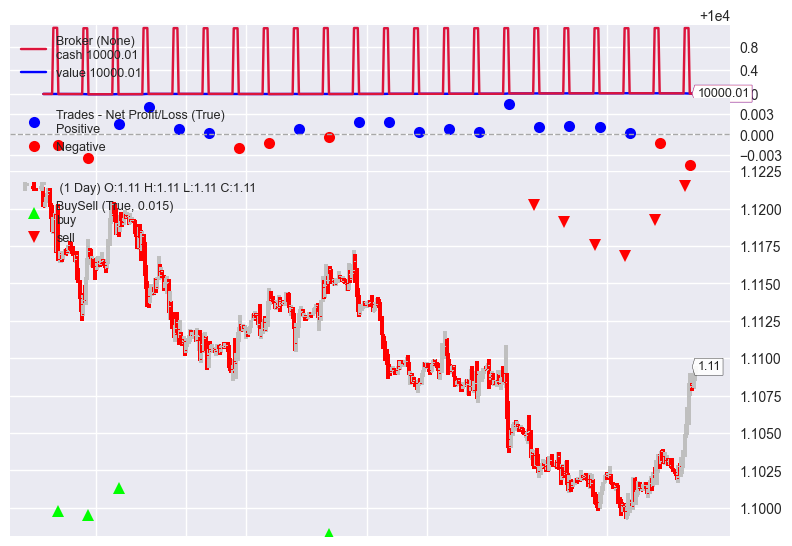

[[<Figure size 800x550 with 3 Axes>]]

In [127]:
## remember to add the code inline, if not the code will crash
%matplotlib widget
%matplotlib inline

# Customize the color cycle
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['red', 'green'])



cerebro.plot(iplot=False, volume=False,style='bar')


In [128]:
# lines = cerebro.plot()
plotlines = dict(
    buy=dict(marker='^', markersize=8.0, color='lime', fillstyle='full'),
    sell=dict(marker='v', markersize=8.0, color='red', fillstyle='full')
)